In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.ticker as ticker
import numpy as np
from datetime import datetime
from matplotlib.ticker import ScalarFormatter

In [2]:
#**** DATA WRANGLING ****
url_confirmed = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv'
confirmed_csv = pd.read_csv(url_confirmed)

In [3]:
confirmed_csv.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,6/22/20,6/23/20,6/24/20,6/25/20,6/26/20,6/27/20,6/28/20,6/29/20,6/30/20,7/1/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,...,29157,29481,29640,30175,30451,30616,30967,31238,31517,31836
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,...,1995,2047,2114,2192,2269,2330,2402,2466,2535,2580
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,11920,12076,12248,12445,12685,12968,13273,13571,13907,14272
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,...,855,855,855,855,855,855,855,855,855,855
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,...,186,189,197,212,212,259,267,276,284,291


In [4]:
print(confirmed_csv.shape)

(266, 166)


In [5]:
print(confirmed_csv.isnull().values.any())

True


In [6]:
print(confirmed_csv.columns[confirmed_csv.isna().any()].tolist())

['Province/State']


In [7]:
confirmed_csv.notna().any()

Province/State    True
Country/Region    True
Lat               True
Long              True
1/22/20           True
                  ... 
6/27/20           True
6/28/20           True
6/29/20           True
6/30/20           True
7/1/20            True
Length: 166, dtype: bool

In [8]:
confirmed_csv.isna().sum()

Province/State    185
Country/Region      0
Lat                 0
Long                0
1/22/20             0
                 ... 
6/27/20             0
6/28/20             0
6/29/20             0
6/30/20             0
7/1/20              0
Length: 166, dtype: int64

In [9]:
confirmed_csv.dropna()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,6/22/20,6/23/20,6/24/20,6/25/20,6/26/20,6/27/20,6/28/20,6/29/20,6/30/20,7/1/20
8,Australian Capital Territory,Australia,-35.4735,149.0124,0,0,0,0,0,0,...,108,108,108,108,108,108,108,108,108,108
9,New South Wales,Australia,-33.8688,151.2093,0,0,0,0,3,4,...,3150,3159,3162,3168,3174,3177,3184,3189,3203,3211
10,Northern Territory,Australia,-12.4634,130.8456,0,0,0,0,0,0,...,29,29,29,29,29,29,29,29,29,30
11,Queensland,Australia,-28.0167,153.4000,0,0,0,0,0,0,...,1066,1066,1066,1067,1067,1067,1067,1067,1067,1067
12,South Australia,Australia,-34.9285,138.6007,0,0,0,0,0,0,...,440,440,440,440,440,440,440,443,443,443
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
249,British Virgin Islands,United Kingdom,18.4207,-64.6400,0,0,0,0,0,0,...,8,8,8,8,8,8,8,8,8,8
250,Turks and Caicos Islands,United Kingdom,21.6940,-71.7979,0,0,0,0,0,0,...,14,14,15,15,16,16,28,41,41,42
255,"Bonaire, Sint Eustatius and Saba",Netherlands,12.1784,-68.2385,0,0,0,0,0,0,...,7,7,7,7,7,7,7,7,7,7
257,Falkland Islands (Malvinas),United Kingdom,-51.7963,-59.5236,0,0,0,0,0,0,...,13,13,13,13,13,13,13,13,13,13


In [10]:
confirmed_MMSM = confirmed_csv.copy()
confirmed_MMSM['max'] = confirmed_MMSM.iloc[:,4:].max(axis=1)
confirmed_MMSM['min'] = confirmed_MMSM.iloc[:,4:].min(axis=1)
confirmed_MMSM['sum'] = confirmed_MMSM.iloc[:,4:].sum(axis=1)
confirmed_MMSM['mean'] = confirmed_MMSM.iloc[:,4:].mean(axis=1)

In [11]:
confirmed_MMSM.sample(5)

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,6/26/20,6/27/20,6/28/20,6/29/20,6/30/20,7/1/20,max,min,sum,mean
58,Hebei,China,39.5490,116.1306,1,1,2,8,13,18,...,349,349,349,349,349,349,349,1,48124,583.321212
202,NaN,Sri Lanka,7.0000,81.0000,0,0,0,0,0,1,...,2014,2033,2037,2039,2047,2054,2054,0,103767,1257.781818
91,NaN,Czechia,49.8175,15.4730,0,0,0,0,0,0,...,11038,11298,11603,11805,11954,12046,12046,0,804945,9756.909091
123,NaN,Guatemala,15.7835,-90.2308,0,0,0,0,0,0,...,15828,16397,16930,17409,18096,19011,19011,0,442318,5361.430303
79,Xinjiang,China,41.1129,85.2401,0,2,2,3,4,5,...,76,76,76,76,76,76,76,0,11199,135.745455


In [12]:
confirmed_CountryMax = confirmed_MMSM.groupby('Country/Region')['max'].sum()
confirmed_CountryMax

Country/Region
Afghanistan           31836
Albania                2580
Algeria               14272
Andorra                 855
Angola                  291
                      ...  
West Bank and Gaza     2758
Western Sahara           10
Yemen                  1190
Zambia                 1632
Zimbabwe                605
Name: max, Length: 188, dtype: int64

In [13]:
#**** VISUALIZATION 1 ****

# Drop unecessary columns, group by country to get totals
confirmed_total_by_date = confirmed_csv.drop(['Province/State', 'Lat', 'Long'], axis=1).groupby('Country/Region').sum().reset_index()
# Melt the dataframe into a tidy format
confirmed_total_by_date = confirmed_total_by_date.melt(id_vars=['Country/Region'], var_name='Date', value_name='Confirmed')
confirmed_total_by_date['Date'] = pd.to_datetime(confirmed_total_by_date.Date)
confirmed_total_by_date = confirmed_total_by_date.drop('Country/Region', axis=1).groupby('Date').sum().reset_index()
confirmed_total_by_date

,Date,Confirmed
0,2020-01-22,555
1,2020-01-23,654
2,2020-01-24,941
3,2020-01-25,1434
4,2020-01-26,2118
...,...,...
157,2020-06-27,9980365
158,2020-06-28,10146089
159,2020-06-29,10302168
160,2020-06-30,10476823


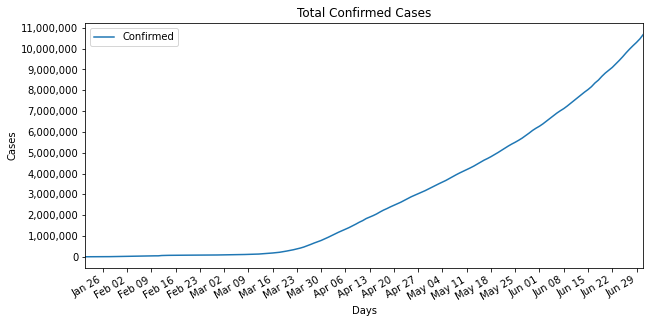

In [14]:
confirmed_total_by_date.plot(x="Date", y="Confirmed", figsize=(10,5))
plt.title('Total Confirmed Cases')
plt.xlabel('Days')
plt.ylabel('Cases')
ax = plt.gca()
ax.xaxis.set_major_locator(mdates.DayLocator(interval=7))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %d'))
ax.yaxis.set_major_locator(ticker.MultipleLocator(1000000))
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))
plt.gcf().autofmt_xdate() # Rotation
plt.show()

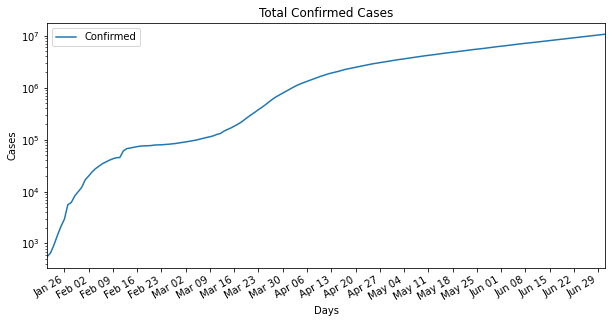

In [15]:
confirmed_total_by_date.plot(x="Date", y="Confirmed", figsize=(10,5))
plt.title('Total Confirmed Cases')
plt.xlabel('Days')
plt.ylabel('Cases')
ax = plt.gca()
ax.xaxis.set_major_locator(mdates.DayLocator(interval=7))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %d'))
plt.gcf().autofmt_xdate() # Rotation
plt.yscale('log')
plt.show()

In [16]:
daily_confirmed = confirmed_total_by_date
daily_confirmed.insert(2, "New Cases", daily_confirmed['Confirmed'].diff(), True)
daily_confirmed['New Cases'] = np.where(daily_confirmed['New Cases'].isnull(),daily_confirmed['Confirmed'],daily_confirmed['New Cases']).astype(int)
daily_confirmed = daily_confirmed.drop(['Confirmed'], axis=1)
daily_confirmed

,Date,New Cases
0,2020-01-22,555
1,2020-01-23,99
2,2020-01-24,287
3,2020-01-25,493
4,2020-01-26,684
...,...,...
157,2020-06-27,178071
158,2020-06-28,165724
159,2020-06-29,156079
160,2020-06-30,174655


In [17]:
daily_confirmed['3 Day Rolling Average'] = daily_confirmed['New Cases'].rolling(3).mean()
daily_confirmed = daily_confirmed.dropna()
daily_confirmed

,Date,New Cases,3 Day Rolling Average
2,2020-01-24,287,313.666667
3,2020-01-25,493,293.000000
4,2020-01-26,684,488.000000
5,2020-01-27,809,662.000000
6,2020-01-28,2651,1381.333333
...,...,...,...
157,2020-06-27,178071,182731.333333
158,2020-06-28,165724,178512.666667
159,2020-06-29,156079,166624.666667
160,2020-06-30,174655,165486.000000


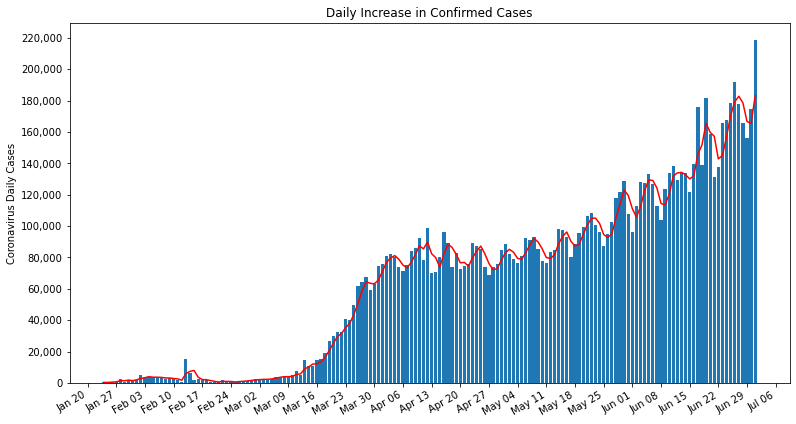

In [18]:
fig = plt.figure(figsize=(10,5))
ax = fig.add_axes([0,0,1,1])
plt.plot(daily_confirmed['Date'], daily_confirmed['3 Day Rolling Average'], color='r')
ax.bar(daily_confirmed['Date'],daily_confirmed['New Cases'])
#plt.yticks(yTicks, yTicks_new)
#plt.xticks(xTicks, rotation=45)
ax = plt.gca()
ax.xaxis.set_major_locator(mdates.DayLocator(interval=7))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %d'))
ax.yaxis.set_major_locator(ticker.MultipleLocator(20000))
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))
plt.gcf().autofmt_xdate() # Rotation
plt.title('Daily Increase in Confirmed Cases')
plt.ylabel('Coronavirus Daily Cases')
plt.show()

In [19]:
#**** VISUALIZATION 2 ****
# Drop unecessary columns, group by country to get totals
confirmed_since_100th_case = confirmed_csv.drop(['Province/State', 'Lat', 'Long'], axis=1).groupby('Country/Region').sum().reset_index()
# Melt the dataframe into a tidy format
confirmed_since_100th_case = confirmed_since_100th_case.melt(id_vars=['Country/Region'], var_name='Date', value_name='Confirmed')
confirmed_since_100th_case['Date'] = pd.to_datetime(confirmed_since_100th_case.Date)
confirmed_since_100th_case

,Country/Region,Date,Confirmed
0,Afghanistan,2020-01-22,0
1,Albania,2020-01-22,0
2,Algeria,2020-01-22,0
3,Andorra,2020-01-22,0
4,Angola,2020-01-22,0
...,...,...,...
30451,West Bank and Gaza,2020-07-01,2758
30452,Western Sahara,2020-07-01,10
30453,Yemen,2020-07-01,1190
30454,Zambia,2020-07-01,1632


In [20]:
confirmed_since_100th_case = confirmed_since_100th_case[confirmed_since_100th_case.Confirmed >= 100]
confirmed_since_100th_case

,Country/Region,Date,Confirmed
36,China,2020-01-22,548
224,China,2020-01-23,643
412,China,2020-01-24,920
600,China,2020-01-25,1406
788,China,2020-01-26,2075
...,...,...,...
30450,Vietnam,2020-07-01,355
30451,West Bank and Gaza,2020-07-01,2758
30453,Yemen,2020-07-01,1190
30454,Zambia,2020-07-01,1632


In [21]:
case_100_by_country = confirmed_since_100th_case.groupby('Country/Region').first().reset_index()
case_100_by_country.drop('Confirmed', axis=1)

,Country/Region,Date
0,Afghanistan,2020-03-27
1,Albania,2020-03-23
2,Algeria,2020-03-21
3,Andorra,2020-03-22
4,Angola,2020-06-10
...,...,...
163,Vietnam,2020-03-22
164,West Bank and Gaza,2020-03-29
165,Yemen,2020-05-15
166,Zambia,2020-04-30


In [22]:
confirmed_since_100th_case.sort_values(['Country/Region', 'Date'])
C_List = confirmed_since_100th_case['Country/Region'].unique()
compiled_df = pd.DataFrame(columns=['Country/Region', 'Date', 'Confirmed'])

for c in C_List: #for every country
    temp = confirmed_since_100th_case.loc[confirmed_since_100th_case['Country/Region'] == c]#Here are the cases over 100 for that country
    temp = temp.assign(Case100 = lambda x: temp['Date'] - temp.loc[temp['Country/Region'] == temp['Country/Region'], 'Date'].iloc[0])#for each of these,subtract dates
    compiled_df = compiled_df.append(temp, ignore_index=True)
    
compiled_df['Case100'] = compiled_df.apply(lambda row: row.Case100.days, axis=1)
confirmed_since_100th_case = compiled_df.rename(columns={'Case100': 'Days since 100th case'})

confirmed_since_100th_case

,Country/Region,Date,Confirmed,Days since 100th case
0,China,2020-01-22,548,0
1,China,2020-01-23,643,1
2,China,2020-01-24,920,2
3,China,2020-01-25,1406,3
4,China,2020-01-26,2075,4
...,...,...,...,...
15287,Namibia,2020-06-30,205,5
15288,Namibia,2020-07-01,285,6
15289,Botswana,2020-06-29,175,0
15290,Botswana,2020-06-30,227,1


In [23]:
confirmed_since_100th_case_groupby = confirmed_since_100th_case.groupby(['Country/Region', 'Date'])
confirmed_since_100th_case_groupby.first()

Confirmed  Days since 100th case
Country/Region Date                                        
Afghanistan    2020-03-27        110                      0
               2020-03-28        110                      1
               2020-03-29        120                      2
               2020-03-30        170                      3
               2020-03-31        174                      4
...                              ...                    ...
Zimbabwe       2020-06-27        567                     31
               2020-06-28        567                     32
               2020-06-29        574                     33
               2020-06-30        591                     34
               2020-07-01        605                     35

[15292 rows x 2 columns]

In [24]:
confirmed_since_100th_case_graph = confirmed_since_100th_case.copy()
confirmed_since_100th_case_graph = confirmed_since_100th_case_graph.set_index(["Country/Region", "Days since 100th case"])
confirmed_since_100th_case_graph = confirmed_since_100th_case_graph.unstack('Country/Region')['Confirmed']

confirmed_since_100th_case_graph.head()

Country/Region,Afghanistan,Albania,Algeria,Andorra,Angola,Argentina,Armenia,Australia,Austria,Azerbaijan,...,United Arab Emirates,United Kingdom,Uruguay,Uzbekistan,Venezuela,Vietnam,West Bank and Gaza,Yemen,Zambia,Zimbabwe
Days since 100th case,,,,,,,,,,,,,,,,,,,,,
0,110,104,139,113,113,128,115,107,104,122,...,113,116,110,104,107,113,109,106,106,132
1,110,123,201,133,118,158,136,128,131,165,...,140,164,135,144,107,123,116,122,109,149
2,120,146,230,164,130,266,160,128,182,182,...,140,207,158,149,119,134,119,128,119,149
3,170,174,264,188,138,301,194,200,246,209,...,153,274,162,172,119,141,134,130,124,174
4,174,186,302,224,140,387,235,250,302,273,...,153,322,189,181,135,153,161,167,137,178


In [25]:
highlighted_countries = ['US', 'Spain', 'Italy', 'Germany', 'United Kingdom', 'Canada', 'Korea, South', 'Ireland', 'Singapore', 'Japan']
gray_countries = case_100_by_country['Country/Region'].tolist()
gray_countries = [e for e in gray_countries if e not in highlighted_countries]
#Is 'US' in the list? If not, it works
'US' in gray_countries

False

In [26]:
last_case_by_country = confirmed_since_100th_case.groupby('Country/Region').last().reset_index()
last_case_by_country = last_case_by_country.drop('Date', axis=1)
last_case_by_country

,Country/Region,Confirmed,Days since 100th case
0,Afghanistan,31836,96
1,Albania,2580,100
2,Algeria,14272,102
3,Andorra,855,101
4,Angola,291,21
...,...,...,...
163,Vietnam,355,101
164,West Bank and Gaza,2758,94
165,Yemen,1190,47
166,Zambia,1632,62


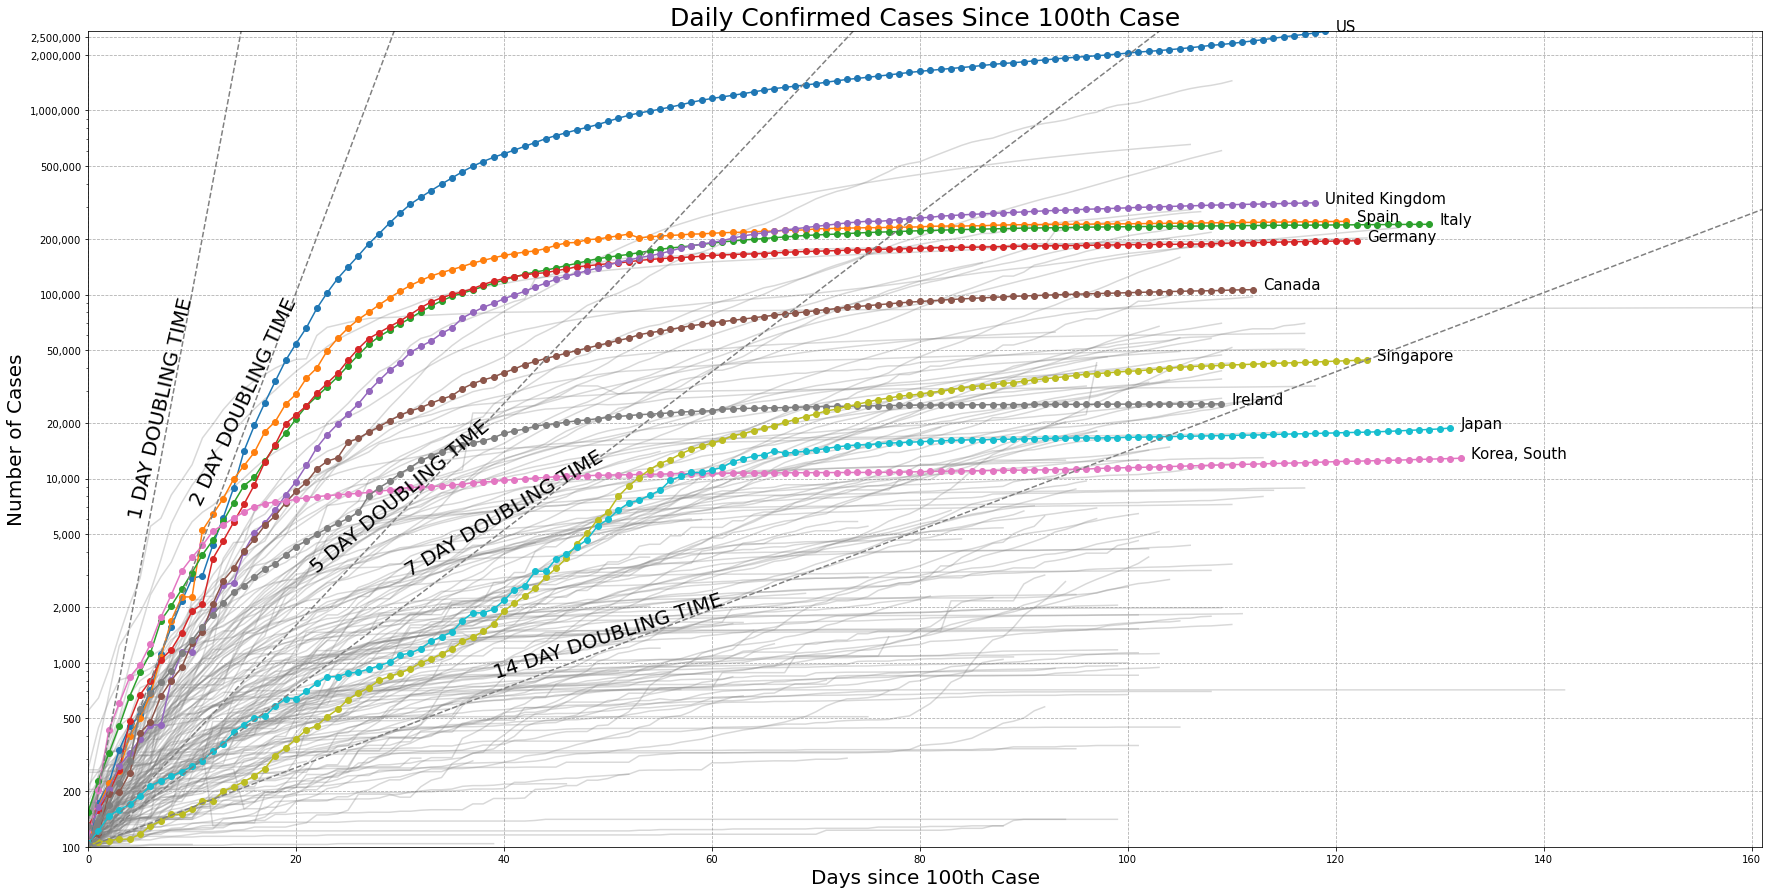

In [27]:
plt.figure(figsize=(30,15))
y_max = max(confirmed_since_100th_case['Confirmed'])
x_max = max(confirmed_since_100th_case_graph.index)

plt.ylim([100, y_max])
plt.xlim([0, x_max])
plt.plot(range(0, len(confirmed_since_100th_case_graph.index)), confirmed_since_100th_case_graph[gray_countries], color="grey", alpha=0.3)
plt.plot(range(0, len(confirmed_since_100th_case_graph.index)), confirmed_since_100th_case_graph[highlighted_countries], '-o')

#COUNTRY LABLES
label_df = last_case_by_country.loc[last_case_by_country['Country/Region'].isin(highlighted_countries)]
offset = 1
for index, row in label_df.iterrows(): 
   plt.text(row['Days since 100th case']+offset, row['Confirmed'], row['Country/Region'], fontsize=15)

#DOUBLING LINES
day1 = np.arange(0, 21, 1)
day2 = np.arange(0, 41, 2)
day5 = np.arange(0, 101, 5)
day7 = np.arange(0, 141, 7)
day14 = np.arange(0, 281, 14)
doubling_function = (2**day1)*100
plt.plot(day1, doubling_function, color="grey", linestyle='dashed')
plt.text(7, 100000, '1 DAY DOUBLING TIME', 
         fontsize=20,
         rotation=77,
         horizontalalignment='center',
         verticalalignment='top',
         multialignment='center')
plt.plot(day2, doubling_function, color="grey", linestyle='dashed')
plt.text(15, 100000, '2 DAY DOUBLING TIME', 
         fontsize=20,
         rotation=65,
         horizontalalignment='center',
         verticalalignment='top',
         multialignment='center')
plt.plot(day5, doubling_function, color="grey", linestyle='dashed')
plt.text(30, 22000, '5 DAY DOUBLING TIME', 
         fontsize=20,
         rotation=40,
         horizontalalignment='center',
         verticalalignment='top',
         multialignment='center')
plt.plot(day7, doubling_function, color="grey", linestyle='dashed')
plt.text(40, 15000, '7 DAY DOUBLING TIME', 
         fontsize=20,
         rotation=31,
         horizontalalignment='center',
         verticalalignment='top',
         multialignment='center')
plt.plot(day14, doubling_function, color="grey", linestyle='dashed')
plt.text(50, 2500, '14 DAY DOUBLING TIME', 
         fontsize=20,
         rotation=18,
         horizontalalignment='center',
         verticalalignment='top',
         multialignment='center')


plt.yscale('log')
plt.margins(0)
plt.grid(True, linestyle='--')
plt.yticks([100, 200, 500, 1000, 2000, 5000, 10000, 20000, 50000, 100000, 200000, 500000, 1000000, 2000000, 2500000], 
           ['100', '200', '500', '1,000', '2,000', '5,000', '10,000', '20,000', '50,000', '100,000', '200,000', '500,000', '1,000,000', '2,000,000', '2,500,000'])
plt.title('Daily Confirmed Cases Since 100th Case', fontsize=25)
plt.ylabel('Number of Cases', fontsize=20)
plt.xlabel('Days since 100th Case', fontsize=20)
plt.show()


In [28]:
# **** VISUALIZATION 3 ****
# Drop unecessary columns, group by country to get totals
confirmed_new_vs_total = confirmed_csv.drop(['Province/State', 'Lat', 'Long'], axis=1).groupby('Country/Region').sum().reset_index()
# Melt the dataframe into a tidy format
confirmed_new_vs_total = confirmed_new_vs_total.melt(id_vars=['Country/Region'], var_name='Date', value_name='Daily Total Cases')
confirmed_new_vs_total['Date'] = pd.to_datetime(confirmed_new_vs_total.Date)
confirmed_new_vs_total

,Country/Region,Date,Daily Total Cases
0,Afghanistan,2020-01-22,0
1,Albania,2020-01-22,0
2,Algeria,2020-01-22,0
3,Andorra,2020-01-22,0
4,Angola,2020-01-22,0
...,...,...,...
30451,West Bank and Gaza,2020-07-01,2758
30452,Western Sahara,2020-07-01,10
30453,Yemen,2020-07-01,1190
30454,Zambia,2020-07-01,1632


In [29]:
#Get Daily New cases/deaths/recovered
confirmed_new_vs_total['Daily New Cases'] = confirmed_new_vs_total.groupby(['Country/Region'])['Daily Total Cases'].diff().fillna(0)
confirmed_new_vs_total['Daily New Cases'] = confirmed_new_vs_total['Daily New Cases'].astype(int)
confirmed_new_vs_total

,Country/Region,Date,Daily Total Cases,Daily New Cases
0,Afghanistan,2020-01-22,0,0
1,Albania,2020-01-22,0,0
2,Algeria,2020-01-22,0,0
3,Andorra,2020-01-22,0,0
4,Angola,2020-01-22,0,0
...,...,...,...,...
30451,West Bank and Gaza,2020-07-01,2758,330
30452,Western Sahara,2020-07-01,10,0
30453,Yemen,2020-07-01,1190,32
30454,Zambia,2020-07-01,1632,38


In [30]:
confirmed_new_vs_total_groupby = confirmed_new_vs_total.groupby(['Country/Region', 'Date'])
confirmed_new_vs_total_groupby.first()

Daily Total Cases  Daily New Cases
Country/Region Date                                          
Afghanistan    2020-01-22                  0                0
               2020-01-23                  0                0
               2020-01-24                  0                0
               2020-01-25                  0                0
               2020-01-26                  0                0
...                                      ...              ...
Zimbabwe       2020-06-27                567                6
               2020-06-28                567                0
               2020-06-29                574                7
               2020-06-30                591               17
               2020-07-01                605               14

[30456 rows x 2 columns]

In [31]:
confirmed_new_vs_total_test = confirmed_new_vs_total[confirmed_new_vs_total['Country/Region'] == 'Russia']
confirmed_new_vs_total_test

,Country/Region,Date,Daily Total Cases,Daily New Cases
140,Russia,2020-01-22,0,0
328,Russia,2020-01-23,0,0
516,Russia,2020-01-24,0,0
704,Russia,2020-01-25,0,0
892,Russia,2020-01-26,0,0
...,...,...,...,...
29656,Russia,2020-06-27,626779,6843
29844,Russia,2020-06-28,633563,6784
30032,Russia,2020-06-29,640246,6683
30220,Russia,2020-06-30,646929,6683


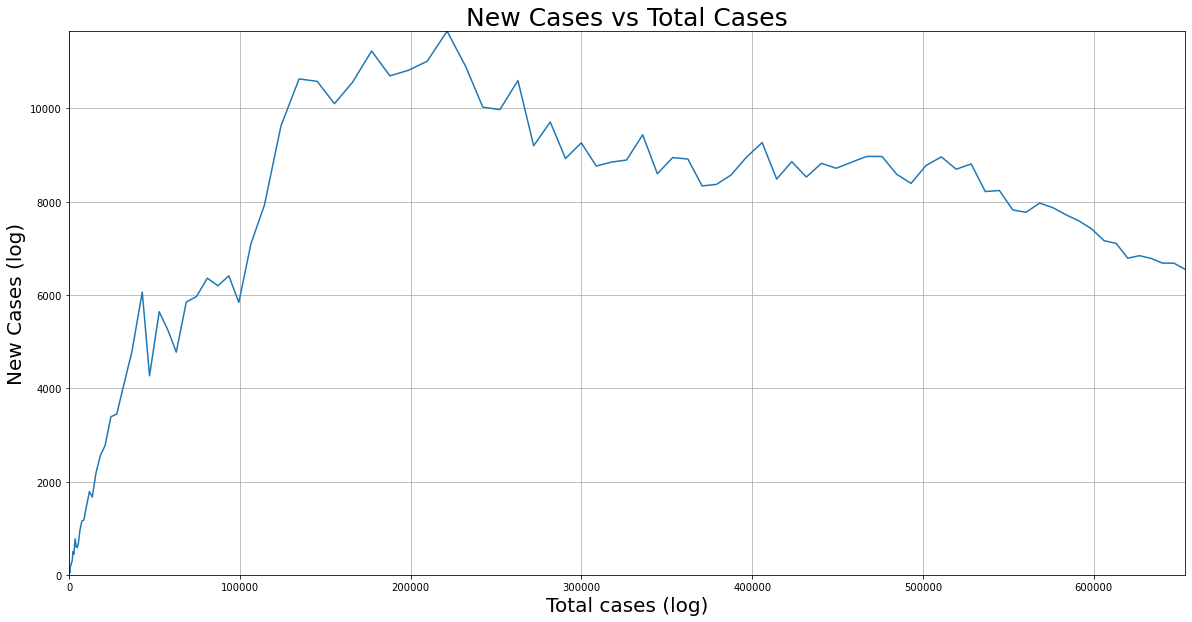

In [32]:
plt.figure(figsize=(20, 10))
df = confirmed_new_vs_total[confirmed_new_vs_total['Country/Region'] == 'Russia']
plt.plot(df['Daily Total Cases'], df['Daily New Cases'])
plt.margins(0)
plt.grid(True)
plt.title('New Cases vs Total Cases', fontsize=25)
plt.ylabel('New Cases (log)', fontsize=20)
plt.xlabel('Total cases (log)', fontsize=20)
plt.show()

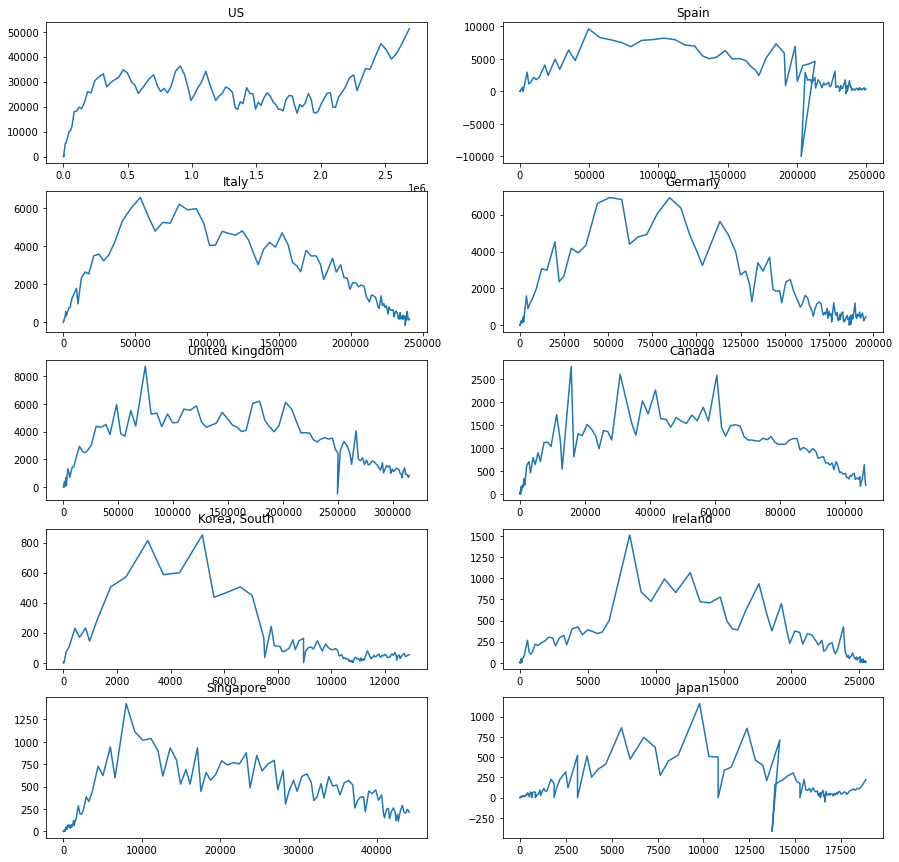

In [33]:
fig,a =  plt.subplots(5,2, figsize=(15,15))
x = 0
for i in range(0, 5):
    for j in range(0, 2):
        country = highlighted_countries[x]
        df = confirmed_new_vs_total[confirmed_new_vs_total['Country/Region'] == country]
        a[i][j].plot(df['Daily Total Cases'], df['Daily New Cases'])
        a[i][j].set_title(country)
        x = x + 1
plt.show()

In [34]:
confirmed_new_vs_total_test = confirmed_new_vs_total[confirmed_new_vs_total['Country/Region'] == 'Spain']
confirmed_new_vs_total_test = confirmed_new_vs_total_test[(confirmed_new_vs_total_test['Daily New Cases'] < 0)]
confirmed_new_vs_total_test

,Country/Region,Date,Daily Total Cases,Daily New Cases
17642,Spain,2020-04-24,202990,-10034
23470,Spain,2020-05-25,235400,-372


In [35]:
confirmed_new_vs_total_test = confirmed_new_vs_total[confirmed_new_vs_total['Country/Region'] == 'Spain']
confirmed_new_vs_total_test = confirmed_new_vs_total_test[confirmed_new_vs_total_test['Date'] > '2020-04-21']
confirmed_new_vs_total_test = confirmed_new_vs_total_test[confirmed_new_vs_total_test['Date'] < '2020-04-27']
confirmed_new_vs_total_test

,Country/Region,Date,Daily Total Cases,Daily New Cases
17266,Spain,2020-04-22,208389,4211
17454,Spain,2020-04-23,213024,4635
17642,Spain,2020-04-24,202990,-10034
17830,Spain,2020-04-25,205905,2915
18018,Spain,2020-04-26,207634,1729


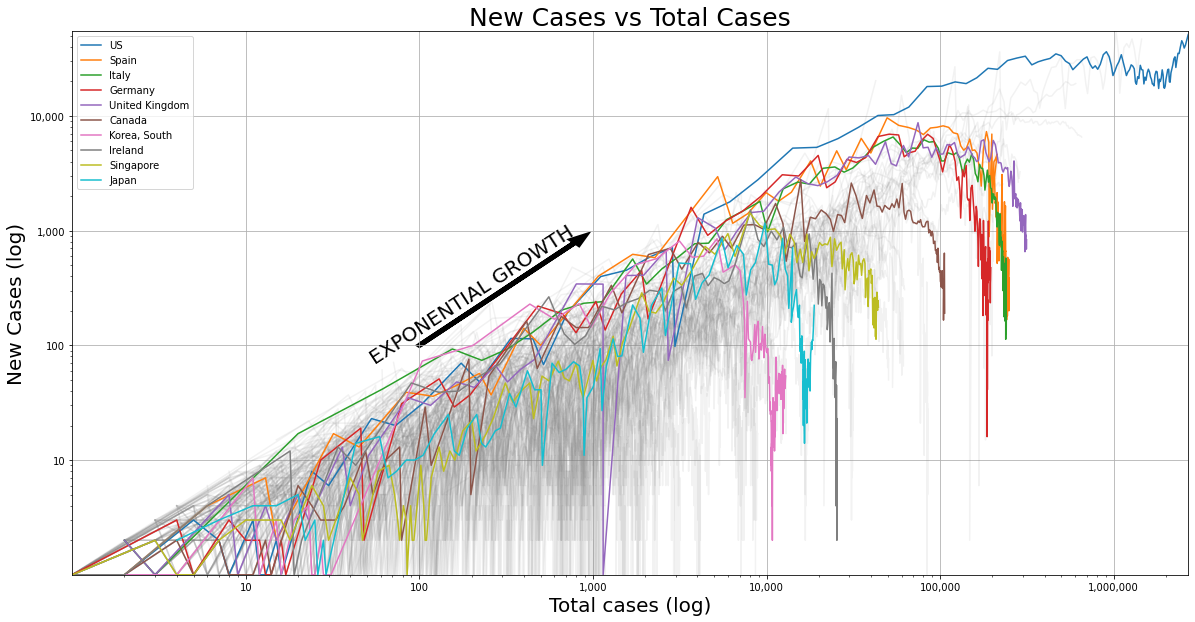

In [36]:
plt.figure(figsize=(20, 10))

for country in gray_countries: 
    df = confirmed_new_vs_total[confirmed_new_vs_total['Country/Region'] == country]
    df = df[(df['Daily New Cases'] > 0)]
    plt.plot(df['Daily Total Cases'], df['Daily New Cases'], color="grey", alpha=0.1)

for country in highlighted_countries: 
    df = confirmed_new_vs_total[confirmed_new_vs_total['Country/Region'] == country]
    df = df[(df['Daily New Cases'] > 0)]
    plt.plot(df['Daily Total Cases'], df['Daily New Cases'], label= country)

leg = plt.legend();
plt.yscale('log')
plt.xscale('log')
plt.yticks([0, 10, 100, 1000, 10000, 100000], 
           ['0', '10', '100', '1,000', '10,000', '100,000'])
plt.xticks([0, 10, 100, 1000, 10000, 100000, 1000000], 
           ['0', '10', '100', '1,000', '10,000', '100,000', '1,000,000'])
plt.margins(0)
plt.grid(True)
plt.title('New Cases vs Total Cases', fontsize=25)
plt.ylabel('New Cases (log)', fontsize=20)
plt.xlabel('Total cases (log)', fontsize=20)

#arrow
plt.arrow(100, 100, 800, 800, lw = 5, length_includes_head=True, head_width=100)
plt.text(200, 1200, 'EXPONENTIAL GROWTH', fontsize=20, rotation=33, horizontalalignment='center', verticalalignment='top', multialignment='center')

plt.show()